In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import os, sys, pandas as pd
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')

import hts_fitting as hts
import hts_misc as misc
import hts_showcase as sc
import hts_anneal as anneal

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: SyntaxWarning: invalid escape sequence '\s'
  return pd.read_csv(fpath, sep='\s+', parse_dates={'datetime' : [0, 1]}, date_format={'date':'%d/%m/%y', 'timestamp':'%H:%M:%S.%f'})


### Rename files

In [15]:
path = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/data/22k_ffj54/Tc/'
misc.renameFiles(path, '-step', '_ffj54-step')

#### Check TV curve sanity

In [2]:
path = '/Users/alexisdevitre/MIT Dropbox/Alexis Devitre/2020 PhD/Research/data/Coated conductors/FFJ/2025-06-13_CFS-H1-2/Tc/30e19pm2/'

fpaths = [path+f for f in np.sort(os.listdir(path)) if 'Tc_' in f]
fpath = fpaths[6]
#fpath = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/data/ffj54/Tc/infield/Tc_2025-06-11_21-34-21816790_ffj54-step06-anneal300k-720min-nomagnet.txt'
print(len(fpaths), fpath)

hts.fitTcMeasurement(fpath, wsz=1, fit_range=(0, 100), vb=True)

NameError: name 'np' is not defined

In [15]:
path = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 5/data/cold_vs_hot/300k_amsc2/Ic/0_degradation/'
path += 'step1/'

fpaths = [path+f for f in np.sort(os.listdir(path)) if 'Tc' in f]

sc.showcaseTVs(fpaths, vb=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 5/data/cold_vs_hot/300k_amsc2/Ic/0_degradation/step1/'

### Check IV curve sanity

In [8]:
path = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/data/ext_ffj50/Ic/infield/'
path += 'step00/magnet/'
fpaths = [path+ f for f in np.sort(os.listdir(path)) if ('Ic_' in f) & ('80k' in f)]
sc.showcaseIVs(fpaths, style='loglog')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/data/ext_ffj50/Ic/infield/step00/magnet/'

### Load beam current data from old files

## Check Temperature vs Time

In [14]:
path = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 5/data/025k_amsc1/env/'
fpaths = [path+f for f in np.sort(os.listdir(path)) if 'temperature_' in f]
data = anneal.concatenateEnvironmentFiles(fpaths)

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='\s+', parse_dates={'datetime' : [0, 1]}, date_format={'date':'%d/%m/%y', 'timestamp':'%H:%M:%S.%f'})
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='\s+', parse_dates={'datetime' : [0, 1]}, date_format={'date':'%d/%m/%y', 'timestamp':'%H:%M:%S.%f'})
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_anneal.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  return pd.read_csv(fpath, sep='

In [ ]:
# fig, ax = plt.subplots()
ax.plot(data.time_s, data.sampleT_K)

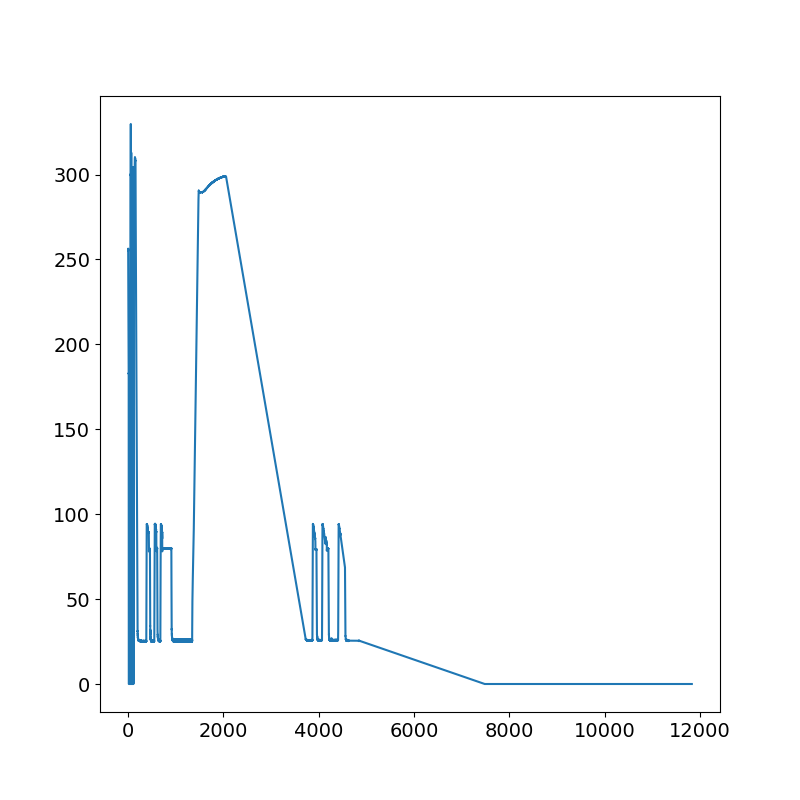

In [15]:
fig, ax = plt.subplots()
ax.plot(data.time_s/60, data.sampleT_K)

In [13]:
# FFJ29
print(92, 5490-5432) # 58 minutes at 92 K
print(6763-6693, 98) # 70 min at 98 K
print(7295-7225, 110) # 70 min at 110 K
print(7569-7500, 121) # 69 min at 120 K
print(7945-7876, 130) # 69 min at 130 K
print(8215-8146, 140) # 69 min at 140 K
print(23739-10529, 150) # 13210 min at 150 K
print(28846-28712, 300) # 134 min at 300 K


# FFJ28
# Cooldown from 100 K takes 52.3 min
t100 = (10330004-10326867)/60
# Cooldown from 200 K takes 66.3 min
t200 = (10516475-10512499)/60
# This is the time it spent at 150 plus cooldown which was not recorded ~ 69 min at 150 K.
(10439521-10431812)/60-np.mean([t100, t200]) 
# 200 K anneal for 59 min
(10450442-10446920)/60
# 250 K anneal not recorded but I rember doing it manually and it spent 60 min at temperature.
60
# 300 K anneal took 427 min
(10510899-10485262)/60

# FFJ23
(187130-183155)/60, (198668-197155)/60 # 300 K
(159881-156140)/60, (175227-171598)/60 #200
(142746-139099)/60 # 150 K

92 58
70 98
70 110
69 121
69 130
69 140
13210 150
134 300


60.78333333333333